# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [111]:
# Leitura dos dados .csv
credit_data = pd.read_csv('CREDIT_SCORE_M20.csv')

# Apagando a coluna descenessária 'Unnamed: 0'
credit_data = credit_data.drop('Unnamed: 0', axis=1)

# Visualização dos resultados
credit_data.head()

,Age,Income,Number of Children,Gender_encoded,ED__BACHELOR'S DEGREE,ED__DOCTORATE,ED__HIGH SCHOOL DIPLOMA,ED__MASTER'S DEGREE,Marital Status Code,Home Ownership Code,Credit Score Code
0,25,50000.0,0,0,True,False,False,False,1,1,1
1,30,100000.0,2,1,False,False,False,True,0,0,1
2,35,75000.0,1,0,False,True,False,False,0,0,1
3,40,125000.0,0,1,False,False,True,False,1,0,1
4,45,100000.0,3,0,True,False,False,False,0,0,1


Separando as bases do arquivo CSV

In [112]:
from sklearn.model_selection import train_test_split

X = credit_data.drop('Credit Score Code', axis=1)
y = credit_data['Credit Score Code']

# Verificando as colunas de cada base
print('Colunas de X: \n', X.columns)
print('\nDados de Y: \n', y)

Colunas de X: 
 Index(['Age', 'Income', 'Number of Children', 'Gender_encoded',
       'ED__BACHELOR'S DEGREE', 'ED__DOCTORATE', 'ED__HIGH SCHOOL DIPLOMA',
       'ED__MASTER'S DEGREE', 'Marital Status Code', 'Home Ownership Code'],
      dtype='object')

Dados de Y: 
 0      1
1      1
2      1
3      1
4      1
      ..
159    2
160    0
161    1
162    1
163    1
Name: Credit Score Code, Length: 164, dtype: int64


Aplicando a separação das bases de treino e de teste

In [113]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

Verificando o tamanho das bases de dados

In [114]:
print('O tamanho de X_train é: ', X_train.value_counts().sum())
print('O tamanho de X_test é: ', X_test.value_counts().sum())
print('O tamanho de y_train é: ', y_train.value_counts().sum())
print('O tamanho de y_test é: ', y_test.value_counts().sum())

O tamanho de X_train é:  123
O tamanho de X_test é:  41
O tamanho de y_train é:  123
O tamanho de y_test é:  41


Verificando o balanceamento da base de dados

In [115]:
print('Verificando o balanceamento de dados da base treino')
print(y_train.value_counts(normalize=True) * 100)

print('\n\nVerificando o balanceamento de dados da base teste')
print(y_test.value_counts(normalize=True) * 100)

Verificando o balanceamento de dados da base treino
Credit Score Code
1    66.666667
0    22.764228
2    10.569106
Name: proportion, dtype: float64


Verificando o balanceamento de dados da base teste
Credit Score Code
1    75.609756
0    19.512195
2     4.878049
Name: proportion, dtype: float64


A base de dados está desbalanceada. No exercício anterior conforme trabalhado, temos que:  
1: Alto  
0: Médio  
2: Baixo  

Portanto, a maior parte dos nossos dados são de Credit Score Alto. Vamos balancear **apenas na base de treino** para não enviesar nosso modelo e aplicar o teste com os dados reais.

In [116]:
from imblearn.over_sampling import SMOTE

# Cria uma instância smote
smote = SMOTE(random_state=0)

# Aplicando apenas na base de TREINO
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificando os tamanhos da base
print('Balanceamento em y_train: \n')
print(y_train_balanced.value_counts(normalize=True))

print('\nTamanho de X_train: ', X_train_balanced.value_counts().sum())
print('\nTamanho de y_train: ', y_train_balanced.value_counts().sum())

Balanceamento em y_train: 

Credit Score Code
1    0.333333
0    0.333333
2    0.333333
Name: proportion, dtype: float64

Tamanho de X_train:  246

Tamanho de y_train:  246


# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

Primeiro, começamos a preparar os dados. Separamos as bases de treino e teste para aprendizado do modelo.  
Segundo, balanceamos as bases **apenas de treino** para evitar vieses do nosso modelo.  
Depois disso, instanciamos a biblioteca do algoritmo definindo o random_state e o criterio gini.  
O modelo parte para o aprendizado, temos o teste para avaliar os resultados e finalizando, ajustamos para melhorias.

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

### Base de Treino

In [117]:
# Instanciamos o modelo com o critério gini e random_state=0
modelo = DecisionTreeClassifier(criterion='gini', random_state=0)

# Aplicamos as bases de dados ao modelo
modelo.fit(X_train_balanced, y_train_balanced)

# Prevemos os valores a partir da base de treino (sem as respostas)
previsoes = modelo.predict(X_train_balanced)

# Relatório de Classificação
relatorio = classification_report(y_train_balanced, previsoes)

print('Relatório de Classificação: \n')
print(relatorio)

Relatório de Classificação: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        82
           2       1.00      1.00      1.00        82

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246



In [118]:
accuracy = accuracy_score(y_train_balanced, previsoes)
print('Acurácia: ', accuracy)

Acurácia:  1.0


# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [125]:
# Prevemos os valores a partir da base de testes
previsoes = modelo.predict(X_test)

# Relatório de Classificação
relatorio = classification_report(y_test, previsoes)

print('Relatório de Classificação: \n')
print(relatorio)

Relatório de Classificação: 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.97      0.98        31
           2       1.00      1.00      1.00         2

    accuracy                           0.98        41
   macro avg       0.96      0.99      0.97        41
weighted avg       0.98      0.98      0.98        41



In [138]:
accuracy = accuracy_score(y_test, previsoes)
print('Acurácia: {:.2f}%'.format(accuracy * 100))

Acurácia: 97.56%


Na base de treino, obtivemos 100% de acurácia. É um pouco preocupante, mas como a base é pequena e realizamos o balanceamento das variáveis preditoras, mantém-se consideravelmente aceitável.  

Na base de teste, obtivemos muito próximo, chegando a quase 98% de acurácia. O modelo se comprova muito eficaz em avaliar a classificação de crédito em nossa pequena base de dados.  

Lembrando que:  
1: Alto  
0: Médio  
2: Baixo

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

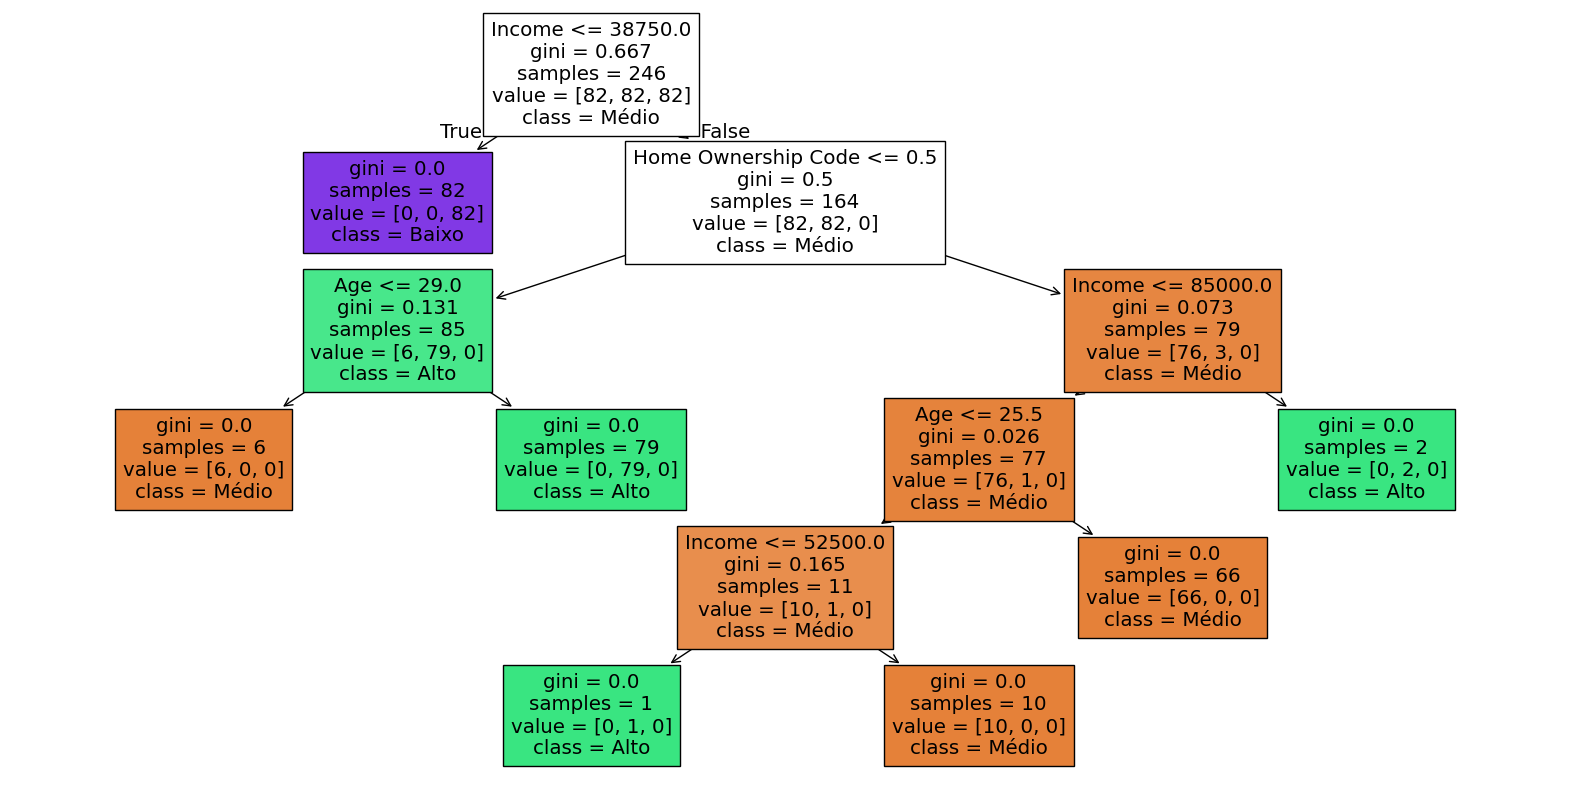

In [ ]:
# Plotando o gráfico com plot_tree para visualizar a Árvore de Decisão
plt.figure(figsize=(20, 10))
plot_tree(
    modelo,
    filled=True,
    feature_names=X_train_balanced.columns,
    class_names=['Médio', 'Alto', 'Baixo']
)
plt.show()

Acima temos a avaliação visual da árvore.  
Podemos notar também que a árvore tem a profundidade igual a 5. Ou seja, ela tem 5 critérios divisores para avaliar o Credit Score de cada cliente.

# 6) Identifique as 2 principais features do modelo.


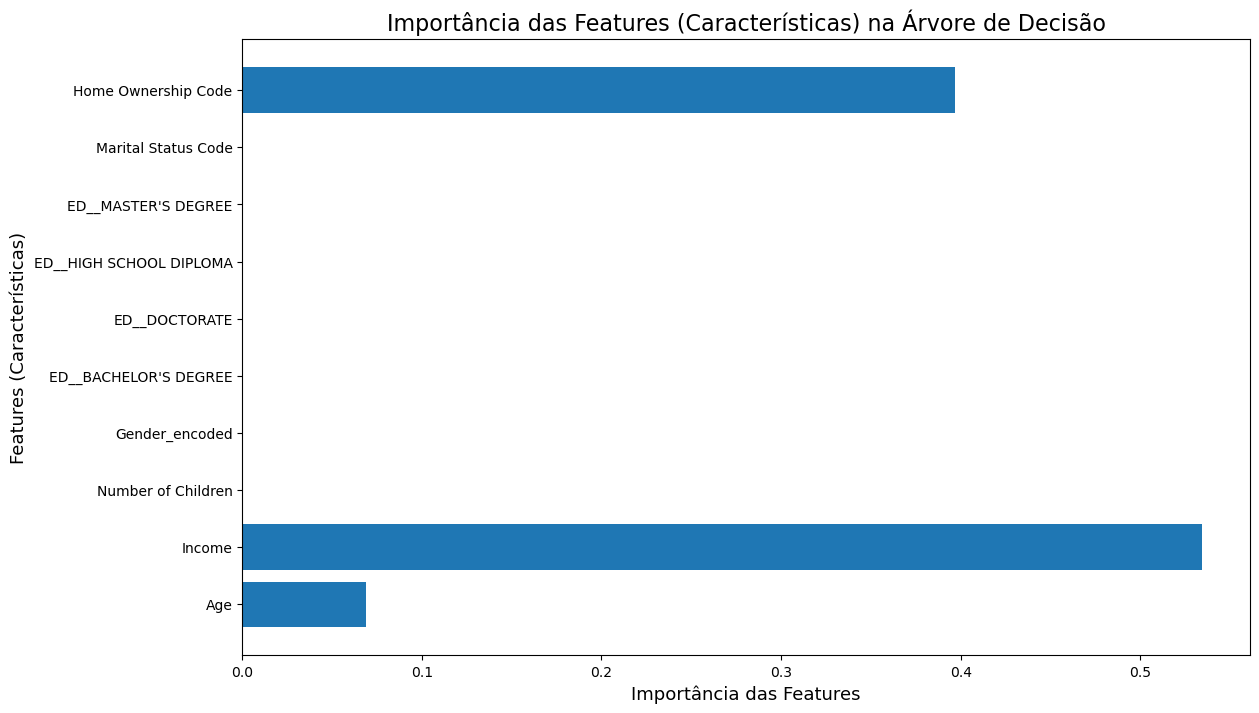

In [157]:
# Obtendo as features mais importantes
features_importantes = modelo.feature_importances_

# Obtendo os nomes das características
nomes_features = X_train_balanced.columns

# Criando um gráfico de barras para visualizar a importância de cada feature
plt.figure(figsize=(13, 8))
plt.barh(nomes_features, features_importantes)
plt.xlabel('Importância das Features', fontsize=13)
plt.ylabel('Features (Características)', fontsize=13)
plt.title('Importância das Features (Características) na Árvore de Decisão', fontsize=16)
plt.show()

Utilizando a função *feature_importances_* podemos avaliar que as duas características mais importantes do modelo são **Income** e **Home_Ownership_Code**.  

Ou seja, o salário e se a pessoa tem casa própria são muito importantes e com um peso extremamente alto para o aprendizado do modelo.

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [ ]:
# Filtrando as features mais importantes
X_train_reduzido = X_train_balanced[['Income', 'Home Ownership Code']]
X_test_reduzido = X_test[['Income', 'Home Ownership Code']]

# Aplicando o modelo na base reduzida para as features mais importantes
modelo_reduzido = DecisionTreeClassifier(criterion='gini', random_state=2)
modelo_reduzido.fit(X_train_reduzido, y_train_balanced)

# Após treinar o modelo, executamos o teste para validação
previsoes_reduzido = modelo_reduzido.predict(X_test_reduzido)

In [169]:
# Criando a variável relatório
relatorio_reduzido = classification_report(y_test, previsoes_reduzido)

print('Relatório de Classificação das Bases Reduzidas\n')
print(relatorio_reduzido)

# Exibindo a acurácia
accuracy_reduzido = accuracy_score(y_test, previsoes_reduzido)
print('Acurácia: {:.2f}%'.format(accuracy_reduzido * 100))

Relatório de Classificação das Bases Reduzidas

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.97      0.97      0.97        31
           2       1.00      1.00      1.00         2

    accuracy                           0.95        41
   macro avg       0.95      0.95      0.95        41
weighted avg       0.95      0.95      0.95        41

Acurácia: 95.12%


Podemos avaliar que o modelo com apenas as 2 features mais importantes teve uma acurácia levemente menor que o modelo com as features completas.  

Após exibir o gráfico com as features mais importantes, obtivemos 3 que se apresentaram importantes para o modelo. Como no modelo reduzido utilizamos apenas 2, é de se esperar que ele performe de forma inferior ao modelo com as 3 melhores features.  

Ainda assim, mesmo com 'Income' e 'Home Ownership' como características, o modelo se apresenta bem acertivo e com alta acurácia.

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

Ambos os modelos são inferenciais, ou seja, tiram conclusões sobre dados a partir de padrões. A ideia é a mesma, porém as Árvores de Decisão são mais visuais e mais simples de entendermos.  

O dataset é pequeno, simples, portanto os dois modelos poderiam performar muito bem.  

Como a acurácia foi muito próxima para qualquer um, pela simples ideia de poder visualizar eu ainda assim usaria Árvores de Decisão para prever a classificação de crédito.